- KEYWORDS: Physical Systems


## Systems of first-order differential equations



### Nonlinear and linear models



-   We consider the most general case of dynamical system that arise in the modelling of physical systems. The majority of  the models takes some differentail equation form since it is build on the notion of states time evolution (e.g. the tank level is a state that changes in the real world industrial plant). In particular, the setting takes the following form:

$$\frac{dx}{dt}=F(x(t),u(t)),\;\;x(0)=x_0$$

where $x(0)=x_0$ is initial condition and $u(t)$ is some input to the system or forcing function. Hence, the $x(t)$-*states* start from the $x_0$ state at time $t=0$ and evolve further in time. The above equation is also equiped with the some expression that usually represents *output*-$y(t)$ of the system so that one  considers the following:

$$y(t)=G(x(t),u(t))$$

-   Finally, the large number of the system takes the form as it is given by above equations.

-   Therefore, the systems description of underlying dynamics considers states $x(t)$, inputs $u(t)$, outputs $y(t)$ and initial conditions in order to completly describe **systems dynamics**.

-   In general, the consideration of the forward time evolution of the nonlinear system is still open research topic.



### Linear models



-   Linear models in general arise by the process of linearization of nonlinear models around operating point of interest. Hence, the linear models is obtained by considering the following proecedure:

-   Obtain the steady state of interest, this is obtained by considering the solution of the nonlinear algebraic equation 
    $$\frac{dx}{dt}=0=F(x_{ss},u_{ss})\;\;\;\rightarrow\;(x_{ss},u_{ss})$$
-   Apply the lienarization at the steady state of interest $x_{ss},u_{ss}$ and express the state as value of the steady state augmented with the perturbation of the state $x_{p}$ (e.g. $x_{ss}+x_p(t)=x(t)$, $u_{ss}+u_p(t)=u(t)$,$y(t)=y_{ss}+y_p(t)$  ),   which yields: 
    $$\frac{dx_{p}}{dt}=\frac{\partial F}{\partial x}|_{x_{ss},u_{ss}}x_p+\frac{\partial F}{\partial u}|_{x_{ss},u_{ss}}u_p$$
    
    $$y_p(t)=\frac{\partial G}{\partial x}|_{x_{ss},u_{ss}}x_p+\frac{\partial G}{\partial u}|_{x_{ss},u_{ss}} u_p$$

-   Finally, the above expression provides well known linear model representation in terms of matrics **(A,B,C,D)** or in the equation form
    $$\begin{array}{ccc}\dot{x}_p(t)&=&Ax_p(t)+Bu_p(t)\\y_p(t)&=&Cx_p(t)+Du_p(t)\end{array}$$
    with initial condition $x_p(0)=x_0$.

-   Taylor expansion of $F(x,u)$ around the steady state:
    $$F(x,u)=\left[\begin{array}{c}f_1(x_1,\cdots,x_n,u_1,\cdots,u_n)\\ \cdots\\ \cdots\\f_n(x_1,\cdots,x_n,u_1,\cdots,u_n) \end{array} \right] $$
    $$F(x,u)=\left[\begin{array}{c}f_1(x_{1ss},\cdots,x_{nss},u_{1s},\cdots,u_{nss})\\ \cdots\\f_n(x_{1ss},\cdots,x_{nss},u_{1ss},\cdots,u_{nss}) \end{array} \right]+\left[\begin{array}{ccc}\frac{\partial f_1}{\partial x_1} & \cdots &\frac{\partial f_1}{\partial x_n} \\\cdots &\cdots & \cdots\\ \frac{\partial f_n}{\partial x_1} & \cdots &\frac{\partial f_n}{\partial x_n} \end{array}  \right]\left[ \begin{array}{c}x_1(t)-x_{1ss}\\\cdots\\x_n(t)-x_{nss} \end{array} \right]+ \left[\begin{array}{ccc}\frac{\partial f_1}{\partial u_1} & \cdots &\frac{\partial f_1}{\partial u_n} \\\cdots &\cdots & \cdots\\ \frac{\partial f_n}{\partial u_1} & \cdots &\frac{\partial f_n}{\partial u_n} \end{array}  \right]\left[ \begin{array}{c}u_1(t)-u_{1ss}\\\cdots\\u_n(t)-u_{nss} \end{array} \right]+H.O.T. $$

and the same applys to $G(x(t),u(t))$, so that by using Taylor expansion one can transform nonlinear to linear models.



### Linear models characteristics



-   Linear models have important characteristics which we will examine and charaterize. For example:

-   Linear models without the input force function (e.g. $u_p=0$) have **unique equilibrium** (or steady state point at zero) providng that matrix $A$ is full rank
-   Linear models reveal the fundamental characteristics of the systems such as stability, controllability and observability (we will discuss in addition controllability and observability)
-   Linear dynamics and state evolution are completely characterized by the eigenvalues of the matrix $A$
    -   Dynamics is charactererized by the distribution of the eigenvalues
        -   eigenvalues of $A$ are distinct and negative $\lambda_i<0$, `stable system`
        -   eigenvalues of $A$ are purely complex number (`marginaly stable`, $\lambda_i=\pm j\omega$)  and other eigenvalues of A negative
        -   eigenvalues of $A$ are at least one positive $\lambda_i>0$, `unstable`
-   The linear system dynamics can be described in the following simple computations.



# Out[13]:
: <matplotlib.text.Text at 0x1064e9b50>

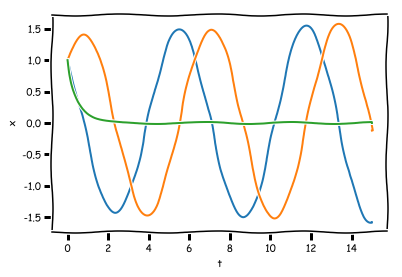

In [1]:
import numpy as np
import math
from numpy import linalg as LA

A = np.array([[0, -1, 0], [1, 0, 0],[0,0,-2]])
print(A)

w, v = LA.eig(A)

print(np.round(w))
print(v)
  
t0=0
x0=np.array([[1],[1],[1]])

t, h = np.linspace(t0, 15, 1000, retstep=True)  # Note the optional argument to get the stepsize.
x = x0
t[0] = t0
x[[0,1,2],0]=1
print(x )

# Implementation of Euler's method
for n in range(0, len(t) - 1):
    x0=x0 + h*np.matmul(A,x0)
    x=np.concatenate((x,x0),axis=1)

print(t)
print(x.transpose())

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t, x.transpose())
plt.xlabel('t')
plt.ylabel('x')
#plt.xlim([x.min(), x.max()])

-   The salient characteristic of linear system is oscilatory behaviour if the eigenvalues are complex. Along the same line, we can infere that scalar systems can have only exponential in time behavior (stable or unstable), while the second order system (matrix $A$ is second and higher order) can have oscillatory behavior. One of the special cases is the situation when eigenvalues are purely complex (that is $\lambda_{1,2}=\pm j\omega$), which characterizes pure oscillatory behavior.



### Linear systems - Reactor stability



-   Model based analysis is beneficial since the model parameters with well defined physical meaning can take a role in the analysis of the dynamical system. Namely, one can consider the following example of reaction engineering system with the following reactor system dynamics. We consider the simple chemical reaction taking place in the CSTR:
    $$A\rightarrow products$$
    and we are aware that this reaction is characterized by the heat release, hence the material and energy balance can be written. It will be demonstrated that the coupling of material and energy balances for the CSTR may give a rise to some surprisingly complex and interesting behavior. We consider, the following balances:
    
    $$\begin{array}{cc}\frac{dC_a}{dt}=&\frac{C_{af}-C_a}{\theta}-kC_a\\ \frac{dT}{dt}=&\frac{U}{Cps}(T_a-T)+\frac{T_f-T}{\theta}-\frac{\triangle H_R }{C_{ps}}kCa \end{array} $$
    
    where the simple first order kinetics is taking place $r_a=kC_a$ with the heating/cooling coil at temperature $T_a$. Hence, the following holds:
    
    $$\begin{array}{c}\frac{dC_a}{dt}=f_1(C_a,T)\\\frac{dT}{dt}=f_2(C_a,T)\end{array}$$
    
    With reactor being at steady state, we are interested in finding out if small perturbations in temperature or concentrations will induce the change to the new steady state conditions or the system will be no sensitive to perturbations. We linearize equations around the steady state of interest which is obtained by calculating the following pair $(C_{as},T_s)$:
    
    $$\begin{array}{c}0=f_1(C_{as},T_s)\\0=f_2(C_{as},T_s)\end{array}$$
    
    so that the following steady states are obtained (with assumption that adiabatic reactor is considered $U=0$) by solving the system of equations:
    
    $$C_{as}=\frac{C_{af}}{1+k(T_s)\theta}$$
    
    and (one can also look at the steady state conversions $x_a=1-\frac{C_a}{C_{af}}$, or $x_a=\frac{k\theta}{1+k\theta}$)
    
    $$T_s=T_f-\theta\left[\frac{\triangle H}{C_{ps}}k(T_s)\frac{C_{af}}{1+k(T_s)\theta} \right]$$
    
    where $k(T_s)=k_me^{-E(1/T_s-1/T_m)}$. One needs to solve for $T_{s}$ values. This can be done with Newton-Raphson method. 
    Hence, by the Taylor series expansion we obtain:
    
    $$\begin{array}{c}f_1(C_{a},T)=f_1(C_{as},T_s)+\frac{\partial f_1}{\partial C_a}(C_a-C_{as})+\frac{\partial f_1}{\partial T}(T-T_s)+higher-order\;terms\\f_2(C_{a},T)=f_2(C_{as},T_s)+\frac{\partial f_2}{\partial C_a}(C_a-C_{as})+\frac{\partial f_2}{\partial T}(T-T_s)+higher-order\;terms\end{array}$$
    
    and we define the perturbation variables as $C_{ap}=C_a-C_{as}$ and $T_p=T-T_s$. Therefore the following approximate linear equations for the perturbation variables are generated
    
    $$\begin{array}{ccc}\frac{dC_{ap}}{dt}&=&\frac{\partial f_1}{\partial C_a}C_{ap}+\frac{\partial f_1}{\partial T}T_p\\\frac{dT_p}{dt}&=&\frac{\partial f_2}{\partial C_{a}}C_{ap}+\frac{\partial f_2}{\partial T}T_p\end{array}$$
    
    In the compact notation, with $x_p=\left[C_{ap}\;T_p\right]$ the above system becomes:
    
    $$\frac{dx_p}{dt}=Jx_p$$
    
    where $J$-Jacobian matrix is given as follows:
    
    $$J=\left[\begin{array}{cc}-\frac{1}{\theta}-k & -kC_{as}\frac{E}{T_s^2}\\-\frac{\triangle H_R}{C_{ps}}k & -\frac{U}{C_{ps}}-\frac{1}{\theta}-\frac{\triangle H_R}{C_{ps}}kC_{as}\frac{E}{T^2_s}\end{array}\right]$$
    
    We consider the following parameters (parameters are taken from example 6.3.1. steady-state multiplicity,  Chemical Reactor Analysis and Design Fundamentals, James Rawlings, John Ekerdt, Nob Hill Publishing, 2002. [https://epdf.pub/chemical-reactor-analysis-and-design-fundamentals.html](https://epdf.pub/chemical-reactor-analysis-and-design-fundamentals.html)):

| Parameters|Value|Units|
|---|---|---|
| $T_f$|298|$K$|
| $T_m$|298|$K$|
| $C_p$|4.0|$Kj/kgK$|
| $C_{af}$|2.0|$kmol/m^3$|
| $k_m$|0.001|$min^{-1}$|
| $E$|8.0$\times10^3$|$K$|
| $\rho$|$10^3$|$kg/m^3$|
| $\triangle H_R$|$-3.0\times 10^5$|kj/kmol|
| U|0||

Let us look at the distribution of the eigenvalues versus the steady state temperature.



# Out[34]:
: <matplotlib.text.Text at 0x108e1c4d0>

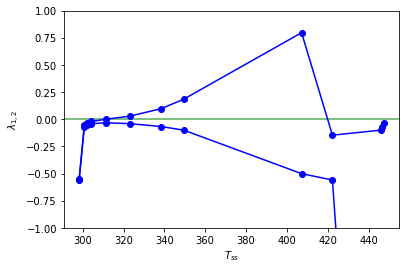

In [1]:
import numpy as np
import math
from numpy import linalg as LA
from numpy.linalg import matrix_rank
from scipy.optimize import fsolve

k_m=0.001#min^{-1}
Tm=298. #K
Tf=298.
E=8.0e3 #K
Caf=2.00
H=-3.e5
Cp=4.
rho_f=1.e3
Cps=rho_f*Cp
U=0

theta      =np.array([1.79 ,15   ,20 ,25 ,30.9, 25 , 15 ,  10, 2.0, 1.79, 10,  15   ,28])
T_guess    =np.array([298.2,300.5,305,307,311 , 324, 338,  360,380, 421 , 440, 446.5,447. ])

def k(T,k_m):
    E=8.0e3
    Tm=298.
    y=k_m*math.exp(-E*(1./T-1./Tm))
    return y
T_s=np.zeros(len(theta))
k_T=np.zeros(len(theta))
Cas=np.zeros(len(theta))
J11=np.zeros(len(theta))
J12=np.zeros(len(theta))
J22=np.zeros(len(theta))
J21=np.zeros(len(theta))
lambda_1=np.zeros(len(theta))
lambda_2=np.zeros(len(theta))

##############################################
### Solving for steady state
##############################################
def f(T,theta):
     k_m=0.001#min^{-1}
     Tm=298. #K
     Tf=298.
     E=8.0e3 #K
     Caf=2.00
     H=-3.e5
     Cp=4.
     rho_f=1.e3
     Cps=rho_f*Cp
     k=k_m*math.exp(-E*(1./T-1./Tm))
     f= Cps*(Tf-T)/theta-k*H*Caf/(1.+k*theta)
     return f

#############################################
for i in range (0,len(theta)):
    T_s[i]=fsolve(f,T_guess[i],theta[i])
    k_T[i]=k(T_s[i],k_m)
    Cas[i]=Caf/(1.+k_T[i]*theta[i])
    J11[i]=(-1./theta[i])-k_T[i]
    J12[i]=-k_T[i]*Cas[i]*E/pow(T_s[i],2.)
    J21[i]=-H*k_T[i]/Cps
    J22[i]=-(1./theta[i])-H*k_T[i]*Cas[i]/Cps*E/pow(T_s[i],2.)
    A=np.matrix([[J11[i],J12[i]],[J21[i],J22[i]]])
    w, v = LA.eig(A)
    #print w
    lambda_1[i]=w[0]
    lambda_2[i]=w[1]


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('$T_{ss}$')
plt.ylabel('$\lambda_{1,2}$')
plt.ylim(-1,1)
plt.axhline(0, color='green', lw=2, alpha=0.5)
plt.plot(T_s,lambda_1,'-bo',T_s,lambda_2,'-bo')
plt.figure()
plt.ylabel('$T_{ss}$')
plt.xlabel('$\Theta$')
plt.plot(theta,T_s,'-r+')
plt.text(x = 1.97, y = 298,s = 'A',fontsize = 14, weight='bold', backgroundcolor = 'white')
plt.text(x = 30,   y = 320,s = 'B',fontsize = 14, weight='bold', backgroundcolor = 'white')
plt.text(x = 2,   y = 435,s = 'C',fontsize = 14, weight='bold', backgroundcolor = 'white')
plt.text(x = 30,   y = 440,s = 'D',fontsize = 14, weight='bold', backgroundcolor = 'white')

-   Above figure shows the multiplicity of steady states when it comes to variation of parameter $\theta$. Namely, as it can be seen the unique value for $\theta$ induces three different values for the $T_ss$. Also, one can find that for different values of $\theta$ corresponding pairs of steady state temperatures and concentrations induce matrix $J$ which has the positive eigenvalues. In other words, the corresponding steady states which belong to the AB-branch are the stable ones, while the BC-branch steady states are unstable ones, and finally the CD-branch is again the stable one. The points where the steady-state curve turns are known as **ignition** (point B) and **extinction** (point A) points.
    -   Another argument to access the stability from the engineering point of view is to consider the mass and energy balance and to substitute the expression of the mass balance for the steady state in the steady state expression for the energy balance, so that:
        
        $$0=-\frac{k}{1+k\theta}C_{af}\triangle H_R+\frac{C_{ps}}{\theta}(T_f-T)=Q_{gen}+Q_{rem}$$
        
        where the first term represent the heat generation rate $Q_{gen}$ while the second term represents the enthalpy difference between the inflow and outflow streams which is denoted as removal rate $Q_{rem}$. One can notice that the steady state represents condition when these two rates are equal in magnitude. Hence, we consider to plot these two functions as temperature varies with the understanding that the first is the nonlinear function of temperature by dependence on the rate constant, and the second term is linear function with slope $\frac{C_{ps}}{\theta}$.



# Out[33]:

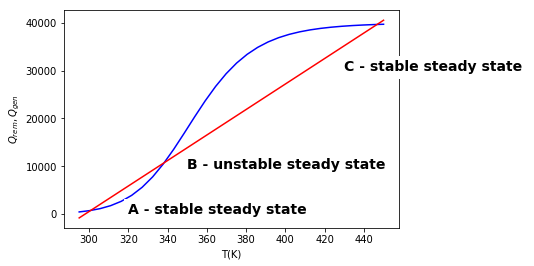

In [1]:
import numpy as np

T=np.linspace(295.,450.,30)
theta=15
Q_gen=np.zeros(len(T))
Q_rem=np.zeros(len(T))

for i in range (0,len(T)):
    Q_gen[i]=-k(T[i],k_m)/(1+k(T[i],k_m)*theta)*Caf*H
    Q_rem[i]=Cps/theta*(T[i]-Tf)


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('T(K)')
plt.ylabel('$Q_{rem},Q_{gen}$')
plt.plot(T,Q_gen,'b-',T,Q_rem,'r-')
plt.text(x = 320., y = 100,s = 'A - stable steady state',fontsize = 14, weight='bold', backgroundcolor = 'white')
plt.text(x = 350,   y =9500,s = 'B - unstable steady state',fontsize = 14, weight='bold', backgroundcolor = 'white')
plt.text(x = 430,   y =30000,s = 'C - stable steady state ',fontsize = 14, weight='bold', backgroundcolor = 'white')

print 302-183

-   As it can be seen from the figure, at the point **A** the slope of the heat removal rate is higher than the slope of heat generation terms and therefore if the reactor temperature is perturbed slightly by the feed it will induce the reactor to cool due to higher removal rate and the temperature will move back to the stable point by system resisting to the temperature perturbation. The similar behavior can be observed in the case of **C** stable steady state point where the temperature in the reactor will also resist to change to the small perturbation by cooling off due to the higher rate removal. On the contrary, the situation for the steady state point **B** reveals that the heat generation term has a higher slope than the heat removal and any small perturbation of the temperature on the branch where heat generation is higher than removal will be amplified and reactor temperature will either escape from the point B up to the higher conversion and temperature steady state or the perturbations can bring it to the lower stable steady state. Finally, any small temperature perturbation around unstable steady state **B** will lead to the transition to either upper or lower steady state.



#### Limit Cycles and sustained oscillations



-   The dynamical behavior of the CSTR with the seemingly simple irreversible kinetics of type $A\rightarrow product$ can be more complex than the analysis of stable and unstable steady states. Namely, the operating parameters of the system might be of the type to support the  sustained oscillations or so called **limit cycle** behavior. We will consider the following parameters:

| Parameters|Value|Units|
|---|---|---|
| $T_f$|298|$K$|
| $T_m$|298|$K$|
| $C_p$|4.0|$Kj/kgK$|
| $C_{af}$|2.0|$kmol/m^3$|
| $k_m$|0.004|$min^{-1}$|
| $E$|1.5$\times10^4$|$K$|
| $\rho$|$10^3$|$kg/m^3$|
| $\triangle H_R$|$-2.2\times 10^5$|kj/kmol|
| U|0||

-   It can be notices that these parameters are slightly different in the values of activation energy $E$ and constant $k_m$.



# Out[6]:
: <matplotlib.text.Text at 0x1087aaf50>

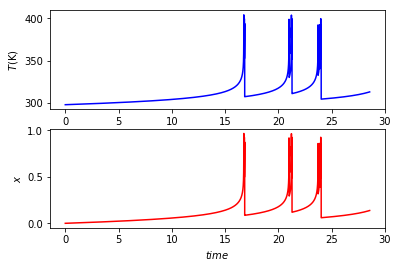

In [1]:
import numpy as np
import math
from scipy.integrate import odeint

tspan=np.linspace(0,100,35000)
x=np.zeros(len(tspan))
T=np.zeros(len(tspan))
def k(T,k_m):
    E=1.5e4
    Tm=298.
    y=k_m*math.exp(-E*(1./T-1./Tm))
    return y
##############################################
### Integration subroutine
##############################################
def fun(t,X):
     theta=35
     Ca=X[0]
     T =X[1]
     k_m=0.004#min^{-1}
     Tf=298.
     Caf=2.00
     H=-2.2e5
     Cp=4.
     rho_f=1.e3
     Cps=rho_f*Cp
     dCdt=(Caf-Ca)/theta-k(T,k_m)*Ca
     dTdt=(Tf -T )/theta-H/Cps*k(T,k_m)*Ca
     y=np.array([dCdt,dTdt])
     return y
#############################################
init=[2.00,298.]

def ode45_step(fun, x, t, dt):
    """
    One step of 4th Order Runge-Kutta method
    """
    k = dt
    k1 = k * fun(t, x)
    k2 = k * fun(t + 0.5*k, x + 0.5*k1 )
    k3 = k * fun(t + 0.5*k, x + 0.5*k2)
    k4 = k * fun(t + dt, x + k3)
    return x + 1/6. * (k1 + 2*k2 + 2*k3 + k4)

def ode45(fun, t, x0):
    """
    4th Order Runge-Kutta method
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i] 
        x[i+1] = ode45_step(fun, x[i], t[i], dt)
    return x


Xres=ode45(fun,tspan,init)

Caf=2.0
x=1.-Xres[:,0]/Caf
T=Xres[:,1]
#print(T)
#print(Xres[:,0])
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.plot(tspan[0:10000],T[0:10000],'b-')
ax1.set_ylabel('$T$(K)')
ax1.set_xlabel('time')

ax2=fig.add_subplot(212)
ax2.plot(tspan[0:10000],x[0:10000],'r-')
ax2.set_ylabel('$x$')
ax2.set_xlabel('$time$')

-   In physical terms the oscillating behavior that we observe can be explained as follows: Since the reaction is exothermic, the heat is liberated as the reaction proceeds. For the proper combination of system parameters, this causes an increase in the reactor temperature which increases the reaction rate constant, k, and therefore the rate at which reactant is converted. This **autocatalytic phenomenon** proceeds at an accelerating rate which becomes much faster than the rate at which reactant is supplied to the system. Therefore, at some point the effective reactant concentration in the system drops to a very small value and the reaction rate term, $kVCa$, becomes very small. At the same time the rate of heat generation caused by the reaction must drop to a low value. Then heat is removed from the system by convective flow and the cooling coil, while the effective reactant concentration is building up. Although the decreasing temperature tends to reduce the magnitude of the reaction rate term, the increasing concentration increases its value. Then at some point the concentration becomes large enough so that the reaction rate term becomes appreciable and the system again follows an autocatalytic path. Thus the composition and temperature in the reactor undergo continuous oscillations, and the reactor outputs will be periodic
even though the inputs are maintained constant.



#### Limit Cycle example



-   In order to demonstrate the limit cycle behavior, we considered the following example given in Chemical Engineering Science publication (*Unsteady state process operation*, J. M. DOUGLAS and D. W. T. RIPPIN, Chemical Engineering Science, 1966, Vol. 21, pp. 305-315). We consider the slightly different system which account for the mass and energy balance, so the dynamics is written as:
    
    $$\begin{array}{ccc}\frac{dz_1}{dt}&=&\frac{q}{v}(1-z_1)-kz_1 \\\frac{dz_2}{dt}&=&\frac{q}{v}(Z_f-Z_2)-\frac{U_aKq_c(z_2-z_c)}{VC_p(1+Kq_c)} +kz_1\end{array}$$
    
    where $z_1=A/A_f$, ($A_f$ is entry feed concentration of species A), $z_2=\frac{TC_p}{(-\triangle H)A_f}$, $Z_c=\frac{T_cC_p}{(-\triangle H)A_f}$, $z_f=\frac{T_fC_p}{(-\triangle H)A_f}$, $K=2C_c\frac{\rho_c}{U_a}$.



Text(0.5, 0, '$z_2$')

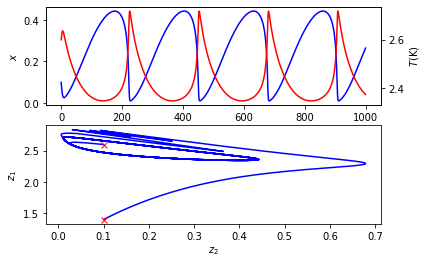

In [10]:
import numpy as np
import math
from scipy.integrate import odeint

V=1000.0 #
A_f=0.0065 #
Tf=350
Tc=408.6
E=28000 #K
R=1.987
del_H=27000.
rho=1.0
C=1.0
Ua=50
K=0.3
k0=math.exp(29.6298)
q=10
q_c=20

tspan=np.linspace(0,1000,1000)

z1=np.zeros(len(tspan))
z2=np.zeros(len(tspan))

def k_T(T,E):
    R=1.987
    y=math.exp(-E/(R*T)+29.6298)
    return y
##############################################
### Integration subroutine
##############################################
def fun(X):
     z1=X[0]
     z2=X[1]
     V=1000.0 #
     A_f=0.0065 #
     Tf=350.
     Tc=408.6
     E=28000. #K
     R=1.987
     del_H=27000.
     rho=1.0
     C=1.0
     Ua=50.
     K=0.3
     #K=2.*C*rho/Ua
     #k0=math.exp(29.6298)
     q=10.
     q_c=5.
     Zf=Tf*C*rho/del_H/A_f
     Zc=Tc*C*rho/del_H/A_f
     T=z2*del_H*A_f/(C*rho)
     dz1dt=( 1.-z1)*q/V-k_T(T,E)*z1
     dz2dt=(Zf-z2)*q/V-Ua*K*q_c*(z2-Zc)/V/C/rho/(1.+K*q_c)+k_T(T,E)*z1
     y=np.array([dz1dt,dz2dt])
     return y
#############################################

def ode45_step(fun, x, t, dt):
    """
    One step of 4th Order Runge-Kutta method
    """
    k = dt
    k1 = k * fun(x)
    k2 = k * fun(x+0.5*k1)
    k3 = k * fun( x + 0.5*k2)
    k4 = k * fun(  x + k3)
    return x + 1/6. * (k1 + 2*k2 + 2*k3 + k4)


def ode45(fun, t, x0):
    """
    4th Order Runge-Kutta method
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n-1):
        dt = t[i+1] - t[i] 
        x[i+1] = ode45_step(fun, x[i], t[i], dt)
    return x


init=np.array([0.1,2.6])
Xres=ode45(fun,tspan,init)

init=np.array([0.1,1.4])
Xres1=ode45(fun,tspan,init)

x=Xres[:,0]
T=Xres[:,1]


#print(T)
#print(x)
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.plot(tspan,x,'b-')
ax1.set_ylabel('$x$')
ax1.set_xlabel('time')

ax2=ax1.twinx()
ax2.plot(tspan,T,'r-')
ax2.set_ylabel('$T$(K)')


ax3=fig.add_subplot(212)
ax3.plot(x,T,'b-',x[0],T[0],'rx',Xres1[:,0],Xres1[:,1],'b-',Xres1[0,0],Xres1[0,1],'rx')
ax3.set_ylabel('$z_1$')
ax3.set_xlabel('$z_2$')

#### Limit Cycle Example



-   Let us consider a simple kinetic model of self-oscillation in glycolysis. We are lookin gin the seminal paper of E.E. Selkov, *Self-Oscillations in Glycolysis*, European J. Biochem. 4 (1968) 79-86. The paper describes a simple kinetic model of an open monosubstrate enzyme reaction with substrate inhibition and product activation. The model yields a kinetic model of phosphofrucktokinase reaction, and represents a momosubstrate and monoproduct reaction, with enzyme that is inhibited by the substrate and activated by the product.
    -   Simple kinetic model of enzymatic catalysis with the product activation of the enzyme is given as
        
        $$S_1+ES_2^{\gamma} \leftrightarrow S_1ES_2^{\gamma} $$
        $$  S_1ES_2^{\gamma}\rightarrow ES_2^\gamma+S_2$$
        $$\gamma S_2+E\leftrightarrow ES_2^\gamma$$
        
        where the substrate $S_1$ (ATP) supplied by a certain source is irreversibly converted to the product $S_2$. The product is removed by an irreversible sink. The free enzyme E (phosphofructokinase) is interactive by itself but becomes active combining with $\gamma$ product molecules to form the complex $ES_2^\gamma$. We introduce a notation that $s_1=[S_1]$, $s_2=[S_2]$, $e=[E]$ and $x_1=[ES_2^\gamma]$, $x_2=[S_1ES_2^\gamma]$. Therefore, according to the mathematical the law of mass action and the law of mass conservation the model is:
        
        $$\frac{ds_1}{dt}=v_1-k_{+1}ss_1x_1+k_{-1}x_2$$
        $$\frac{ds_2}{dt}=k_{ + 2}x_2-k_{ + 3}s_2^\gamma+k_{-3}x_1-k_2s_2$$
        $$\frac{dx_1}{dt}=-k_{+ 1}s_1x_1+(k_{ - 1}+k_{+2})x_2+k_{+3}s_2e-k_{-3}x_1 $$
        $$\frac{dx_2}{dt}=k_{+1}s_1x_1-(k_{-1}+k_{+2})x_2$$
        $$\frac{de}{dt}=-k_{+3}s_2e+k_{-3}x_1$$
    
    -   After some order reduction and system approximations the above system of reactions becomes:
        
        $$\frac{dx}{dt}=1-xy^\gamma$$
        $$\frac{dy}{dt}=\alpha y (x y^{\gamma-1}-1)$$
        
        where at $\gamma >1$ system represents a mathematical model of a product-activated and substrate-inhibited reaction (**Remark:** The above system is a generalization of Lotka system and coincides with it for $\gamma=1$).



Text(0.5, 0, '$y$')

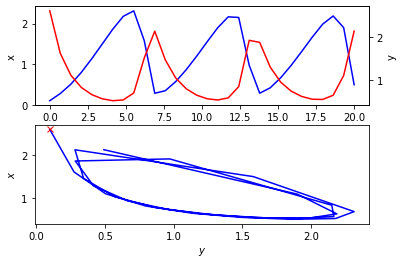

In [8]:
import numpy as np
import math
from scipy.integrate import odeint

alpha=1.1 #
gamma=2 #  

tspan=np.linspace(0,20,30)

x=np.zeros(len(tspan))
y=np.zeros(len(tspan))

##############################################
### Integration subroutine
##############################################
def fun(X,t):
    x=X[0]
    y=X[1]
    alpha=1.1
    gamma=2
    dxdt=1.-x*pow(y,gamma)
    dydt=alpha*y*(x*pow(y,gamma-1)-1)
    y=np.array([dxdt,dydt])
    return y
#############################################

init=np.array([0.1,2.6])
Xres=odeint(fun,init,tspan)

%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.plot(tspan,Xres[:,0],'b-')
ax1.set_ylabel('x')
ax1.set_xlabel('time')

ax2=ax1.twinx()
ax2.plot(tspan,Xres[:,1],'r-')
ax2.set_ylabel('y')


ax3=fig.add_subplot(212)
ax3.plot(Xres[:,0],Xres[:,1],'b-',Xres[0,0],Xres[0,1],'rx')
ax3.set_ylabel('$x$')
ax3.set_xlabel('$y$')

### Final Note on Nonlinear and Linear Systems



-   Linear systems (e.g. models of type $A,B,C,D$) analysis is well known and established engineering material.
    -   We will realize that the liner system properties (stability, controllability and observability) can be easily established and quantified.
    -   The link between local linear analysis and full nonlinear dynamical description is established.
    -   We consider different types of nonlinear behaviour among each the limit cycle is the most transparent and emerges from the simple model.



## Summary



-   We learned how to starting from the general nonlinear equations obtain linear equations.
    -   We learned characteristics of linear models and we explore numerical solutions of the linear models

